# Capstone 2: Data Wrangling #

In [1]:
# Import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create a dataframe from the CSV file containing the scraped data
df = pd.read_csv('scraped_data.csv', sep=';')

In [3]:
# Get a summary of the data
df.info

<bound method DataFrame.info of             date         comuna     home_type  state total_area built_area  \
0     2020-09-10       Santiago  Departamento  usada        NaN        NaN   
1     2020-09-10    Puente Alto  Departamento  usada         42        NaN   
2     2020-09-09          Ñuñoa  Departamento  usada         70        NaN   
3     2020-09-09       Santiago  Departamento  usada         23        NaN   
4     2020-09-09       Santiago  Departamento  usada        163        NaN   
...          ...            ...           ...    ...        ...        ...   
5858  2020-02-20  Padre Hurtado       Parcela  usada      5.000        300   
5859  2020-02-20      Melipilla       Parcela  usada      5.050        370   
5860  2020-09-09       Santiago       Estudio  usada         20        NaN   
5861  2020-09-09       Santiago       Estudio  usada         29        NaN   
5862  2020-07-10       Recoleta       Estudio  usada         31        NaN   

      bedrooms  bathrooms furni

In [4]:
# Check the data type of each column
df.dtypes

date            object
comuna          object
home_type       object
state           object
total_area      object
built_area      object
bedrooms       float64
bathrooms      float64
furnished       object
address         object
description     object
price           object
unit            object
dtype: object

In [5]:
# Have a look at the first few rows
df.head()

,date,comuna,home_type,state,total_area,built_area,bedrooms,bathrooms,furnished,address,description,price,unit
0,2020-09-10,Santiago,Departamento,usada,NaN,NaN,NaN,NaN,NaN,"Santiago, Santiago, Región Metropolitana",CODIGO INTERNO: 56117 Se Vende Impecable Depar...,73.000.000,CLP
1,2020-09-10,Puente Alto,Departamento,usada,42,NaN,2.0,1.0,NaN,"Puente Alto, Sgto Menadier 2779","Departamento ubicado en segundo piso, en plena...",25.000.000,CLP
2,2020-09-09,Ñuñoa,Departamento,usada,70,NaN,2.0,2.0,NaN,"Ñuñoa, Irarrázaval 1401",Depto Vista despejada 2D 2B E B *2 dormitorios...,4.900,UF
3,2020-09-09,Santiago,Departamento,usada,23,NaN,1.0,1.0,NaN,"Santiago, Huérfanos",Oportunidad Inversionistas o particulares. Ven...,1.575,UF
4,2020-09-09,Santiago,Departamento,usada,163,NaN,3.0,4.0,NaN,"Santiago, Vespucio Norte","Vespucio Norte, Las Condes, Vendo confortable ...",13.500,UF


In [6]:
# See how many of each type of there is
df.home_type.value_counts()

Departamento    3430
Casa            2142
Parcela          284
Estudio            6
Loft               1
Name: home_type, dtype: int64

In [7]:
# See the number of used (usada) vs new (nueva)
df.state.value_counts()

usada    5795
nueva      68
Name: state, dtype: int64

In [8]:
# Check how many homes are furnished. Only furnished homes have a value for this field
df.furnished.value_counts()

Sí    137
Name: furnished, dtype: int64

A word on the currencies: UF refers to *unidad de fomento*, which translates as "unit of account". In Chile, property prices are often expressed in UF to protect them from currency devaluation. More information on UF here:  https://en.wikipedia.org/wiki/Unidad_de_Fomento. CLP refers to the Chilean Peso, and USD is United States Dollars.  We will eventually convert all of the prices into UF At the time of this writing, one UF is qual to 28678.52 CLP or 36.79 USD.

In [9]:
# See what currencies are used to express price
df.unit.value_counts()

UF     3714
CLP    2146
USD       3
Name: unit, dtype: int64

The plot below shows that the *comuna* of Santiago has by far the most listings.  This is most likely an error due to the fact that Santiago refers to both the city as a whole, and the *comuna* of Santiago which is in the center of the city. Returning to the website and running a search for houses in the *comuna* of Santiago returns houses which, upon reading the description, turn out to really be located in different *comunas*.

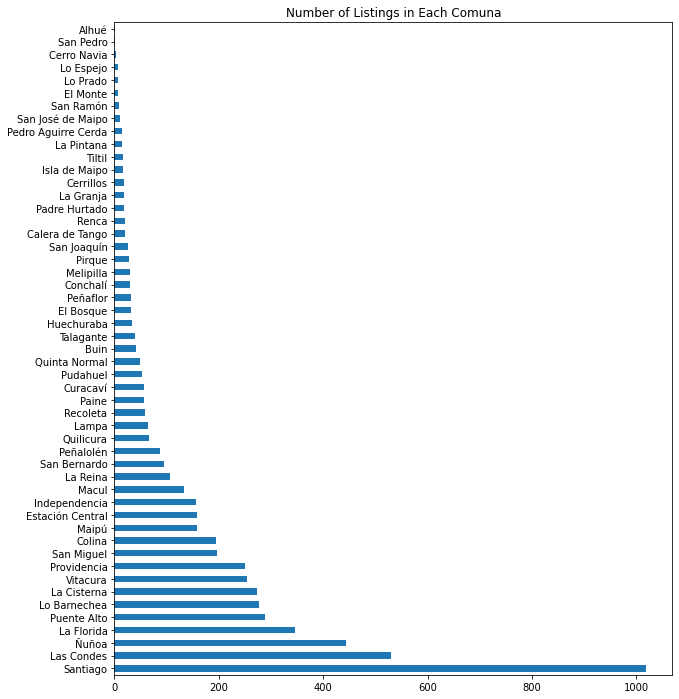

In [10]:
# Check the number of listings per comuna
df.comuna.value_counts().plot(kind='barh', figsize=(10, 12), title='Number of Listings in Each Comuna');

In order to find listings with the incorrect comuna, we make a list of comunas, including the names in all lowercase letters, and than check to see if any of the homes listed as being in Santiago contain the names of other comunas in their addresses or descriptions.

In [11]:
comunas_list = list(df.comuna.unique())
comunas_list.remove('Santiago')
comunas_lower = [comuna.lower() for comuna in comunas_list]
comunas_list.extend(comunas_lower)
print(comunas_list)

['Puente Alto', 'Ñuñoa', 'Macul', 'Independencia', 'Providencia', 'San Miguel', 'La Cisterna', 'Cerro Navia', 'Las Condes', 'Quinta Normal', 'La Florida', 'Recoleta', 'Estación Central', 'Vitacura', 'Peñalolén', 'Maipú', 'Lo Barnechea', 'La Reina', 'Talagante', 'San Joaquín', 'La Pintana', 'Quilicura', 'San Bernardo', 'Renca', 'Huechuraba', 'Pedro Aguirre Cerda', 'Conchalí', 'Lo Espejo', 'El Bosque', 'La Granja', 'Pudahuel', 'San Ramón', 'Alhué', 'Melipilla', 'Lo Prado', 'Peñaflor', 'Colina', 'Cerrillos', 'Lampa', 'El Monte', 'Padre Hurtado', 'Tiltil', 'Paine', 'Buin', 'Curacaví', 'Calera de Tango', 'Pirque', 'Isla de Maipo', 'San José de Maipo', 'San Pedro', 'puente alto', 'ñuñoa', 'macul', 'independencia', 'providencia', 'san miguel', 'la cisterna', 'cerro navia', 'las condes', 'quinta normal', 'la florida', 'recoleta', 'estación central', 'vitacura', 'peñalolén', 'maipú', 'lo barnechea', 'la reina', 'talagante', 'san joaquín', 'la pintana', 'quilicura', 'san bernardo', 'renca', 'hue

In [12]:
df[(df.comuna=='Santiago') & ((df.address.str.contains('|'.join(comunas_list))|(df.description.str.contains('|'.join(comunas_list)))))]

,date,comuna,home_type,state,total_area,built_area,bedrooms,bathrooms,furnished,address,description,price,unit
4,2020-09-09,Santiago,Departamento,usada,163,NaN,3.0,4.0,NaN,"Santiago, Vespucio Norte","Vespucio Norte, Las Condes, Vendo confortable ...",13.500,UF
35,2020-09-03,Santiago,Departamento,usada,80,NaN,2.0,2.0,NaN,"Santiago, Fernández Concha",Código Interno: Ñuñoa_144 Amplio departamento ...,4.700,UF
46,2020-08-28,Santiago,Departamento,usada,67,NaN,2.0,2.0,NaN,"Santiago, Av. Perú 981",Se vende excelente departamento ubicado en ave...,4.300,UF
54,2020-08-27,Santiago,Departamento,usada,118,NaN,3.0,2.0,NaN,"Santiago, Bergen",Luminoso departamento con vista despejada en r...,10.190,UF
100,2020-04-23,Santiago,Departamento,usada,121,NaN,4.0,2.0,NaN,"Santiago, Dublé Almeyda 2020",OPORTUNIDAD ÚNICA !!! Excelente departamento e...,6.450,UF
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5545,2020-06-12,Santiago,Casa,usada,103,51,3.0,1.0,NaN,"Santiago, Guayacan Larapinta, Lampa",Casa ubicada en sector residencial (Larapinta)...,50.000.000,CLP
5547,2020-06-11,Santiago,Casa,usada,190,190,3.0,1.0,NaN,"Santiago, Virgo","CASA EN VENTA Calle Virgo, Lo Prado $87.000.00...",87.000.000,CLP
5586,2020-08-03,Santiago,Parcela,usada,5.000,300,5.0,3.0,NaN,"Santiago, Peñaflor","Parcela de 5000 metro en Peñaflor, en Avenida ...",8.150,UF
5802,2020-08-27,Santiago,Parcela,usada,5.000,300,5.0,5.0,NaN,"Santiago, Santa Rosa de Lampa",Amplia parcela en Condominio Santa Rosa de Lam...,9.000,UF


In [13]:
# Get a list of indices to iterate over
indices = list(df[(df.comuna=='Santiago') & ((df.address.str.contains('|'.join(comunas_list))|
                                              (df.description.str.contains('|'.join(comunas_list)))))].index)
print(indices)

[4, 35, 46, 54, 100, 488, 511, 577, 580, 618, 669, 867, 869, 907, 909, 911, 915, 1047, 1136, 1137, 1138, 1139, 1142, 1402, 1443, 1445, 1448, 1548, 1721, 1722, 1731, 1931, 2028, 2618, 2657, 2881, 3009, 3022, 3041, 3043, 3082, 3106, 3107, 3109, 3110, 3112, 3121, 3133, 3144, 3147, 3160, 3163, 3235, 3237, 3261, 3290, 3300, 3310, 3311, 3318, 3320, 3325, 3353, 3463, 3475, 3488, 3525, 3534, 3736, 3963, 4282, 4378, 4379, 4393, 4398, 4437, 4997, 5052, 5056, 5069, 5096, 5099, 5115, 5126, 5140, 5152, 5162, 5164, 5171, 5189, 5195, 5220, 5264, 5300, 5308, 5313, 5324, 5325, 5331, 5332, 5367, 5376, 5396, 5407, 5439, 5452, 5463, 5479, 5489, 5497, 5511, 5528, 5545, 5547, 5586, 5802, 5860]


In [14]:
# Drop row missing description (comuna is correct)
indices.remove(911)

In [15]:
# Changes comuna to whichever comuna name was found in the address or description
# Creates a list of indices of rows where multiple comuna names were found
found_multiple = []
for i in indices:
    comunas_found = []
    for comuna in comunas_list:
        if comuna in df.loc[i, 'address']:
            df.loc[i, 'comuna'] = comuna.title()
            comunas_found.append(comuna)
        elif comuna in df.loc[i, 'description']:
            df.loc[i, 'comuna'] = comuna.title()
            comunas_found.append(comuna)
    if len(set(comunas_found)) > 1:
        found_multiple.append(i)

In [16]:
# See that the comuna values have been changed
df.loc[indices]

,date,comuna,home_type,state,total_area,built_area,bedrooms,bathrooms,furnished,address,description,price,unit
4,2020-09-09,Las Condes,Departamento,usada,163,NaN,3.0,4.0,NaN,"Santiago, Vespucio Norte","Vespucio Norte, Las Condes, Vendo confortable ...",13.500,UF
35,2020-09-03,Ñuñoa,Departamento,usada,80,NaN,2.0,2.0,NaN,"Santiago, Fernández Concha",Código Interno: Ñuñoa_144 Amplio departamento ...,4.700,UF
46,2020-08-28,Recoleta,Departamento,usada,67,NaN,2.0,2.0,NaN,"Santiago, Av. Perú 981",Se vende excelente departamento ubicado en ave...,4.300,UF
54,2020-08-27,Las Condes,Departamento,usada,118,NaN,3.0,2.0,NaN,"Santiago, Bergen",Luminoso departamento con vista despejada en r...,10.190,UF
100,2020-04-23,Ñuñoa,Departamento,usada,121,NaN,4.0,2.0,NaN,"Santiago, Dublé Almeyda 2020",OPORTUNIDAD ÚNICA !!! Excelente departamento e...,6.450,UF
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5545,2020-06-12,Lampa,Casa,usada,103,51,3.0,1.0,NaN,"Santiago, Guayacan Larapinta, Lampa",Casa ubicada en sector residencial (Larapinta)...,50.000.000,CLP
5547,2020-06-11,Lo Prado,Casa,usada,190,190,3.0,1.0,NaN,"Santiago, Virgo","CASA EN VENTA Calle Virgo, Lo Prado $87.000.00...",87.000.000,CLP
5586,2020-08-03,Peñaflor,Parcela,usada,5.000,300,5.0,3.0,NaN,"Santiago, Peñaflor","Parcela de 5000 metro en Peñaflor, en Avenida ...",8.150,UF
5802,2020-08-27,Lampa,Parcela,usada,5.000,300,5.0,5.0,NaN,"Santiago, Santa Rosa de Lampa",Amplia parcela en Condominio Santa Rosa de Lam...,9.000,UF


In [17]:
# Drop rows where multiple comunas were found in description or address
print('rows before: ', df.shape[0])
df = df.drop(found_multiple)
print('rows after: ', df.shape[0])

rows before:  5863
rows after:  5849


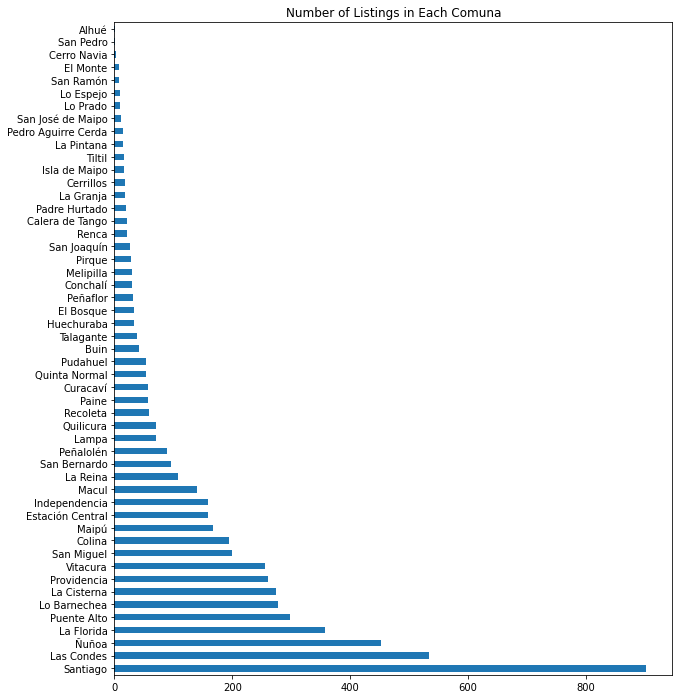

In [18]:
# Check the number of listings per comuna again
# Slightly less imbalanced now
df.comuna.value_counts().plot(kind='barh', figsize=(10, 12), title='Number of Listings in Each Comuna');

Now to address the numerical features, all of whose values are in string form.  In order to perform analysis on these, we will have to convert them to floats or integers.  Remember, in Spanish commas are used for decimals, and periods are used to show thousands, millions, billions, etc.  To address this, we will go column by column, first removing the existing periods, then replacing the commas with periods.

In [19]:
pd.options.mode.chained_assignment = None

In [20]:
# See how many rows with commas there are in the total_area column
print('strings with commas: ', len(df[df.total_area.str.contains(',', na=False)]))
df[df.total_area.str.contains(',', na=False)].head()

strings with commas:  212


,date,comuna,home_type,state,total_area,built_area,bedrooms,bathrooms,furnished,address,description,price,unit
31,2020-09-05,Macul,Departamento,usada,"82,34",NaN,3.0,2.0,NaN,"Macul, Cod 47 Av. Macul",Work Inmobiliario vende hermoso departamento u...,125.000.000,CLP
37,2020-09-02,Santiago,Departamento,usada,"50,5",NaN,2.0,2.0,NaN,"Santiago, Lord Cochrane 302",Metro Parque Almagro Departamento 2D - 2B - E ...,3.100,UF
74,2020-08-19,Santiago,Departamento,usada,"62,5",NaN,3.0,2.0,NaN,"Santiago, Av. Brasil 875","Vendo departamento 3 dormitorios, 2 baños, Bar...",3.200,UF
476,2020-09-10,Providencia,Departamento,usada,"51,4",NaN,1.0,1.0,NaN,"Providencia, Suecia / Los Leones",Precioso Loft a pasos de Providencia Para visi...,5.300,UF
559,2020-09-09,Vitacura,Departamento,usada,"143,2",NaN,4.0,4.0,NaN,"Vitacura, Las Hualtatas-Luis Carrera-Parque Ar...","Departamemento en Venta Vitacura, Coordinar vi...",11.500,UF


In [21]:
# Replace periods with empty strings, then replace commas with periods
df['total_area'] = df['total_area'].str.replace('[A-Za-z]','').str.replace('.','').str.replace(',','.')
print('strings with commas: ', len(df[df.total_area.str.contains(',', na=False)]))

strings with commas:  0


In [22]:
# Change data type to float
df.total_area = pd.to_numeric(df.total_area)
df.total_area.dtype

dtype('float64')

In [23]:
# See how many rows with commas there are in the built_area column
print('strings with commas: ', len(df[df.built_area.str.contains(',', na=False)]))
df[df.built_area.str.contains(',', na=False)].head()

strings with commas:  21


,date,comuna,home_type,state,total_area,built_area,bedrooms,bathrooms,furnished,address,description,price,unit
3817,2020-09-07,Las Condes,Casa,usada,224.84,"112,15",4.0,2.0,NaN,"Las Condes, Casa Juan Palau con Fleming",Se Vende casa al interior de Pasaje Juan Palau...,11.000,UF
3819,2020-09-07,Las Condes,Casa,usada,209.00,"154,24",4.0,3.0,NaN,"Las Condes, Casa en venta para remodelación en...",En venta casa para remodelación en Las Condes....,280.000.000,CLP
3820,2020-09-07,Providencia,Casa,usada,447.20,"306,64",4.0,4.0,NaN,"Providencia, Casa en Valenzuela Castillo",Oportunidad!! Hermosa Casa en Venta en Provide...,650.000.000,CLP
3839,2020-09-06,Talagante,Casa,usada,220.00,"110,23",4.0,3.0,NaN,"Talagante, rafael calderon avila 707","Se Vende hermosa casa aislada de 110,23 mt2 de...",4.800,UF
4160,2020-09-04,La Reina,Casa,usada,142.00,"133,34",4.0,2.0,NaN,"La Reina, Monseñor Edwards / Príncipe de Gales",CASA EN VENTA EN LA REINA Acogedora casa de pi...,9.600,UF


In [24]:
# Replace periods with empty strings, then replace commas with periods
df['built_area'] = df['built_area'].str.replace('[A-Za-z]','').str.replace('.','').str.replace(',','.')
print('strings with commas: ', len(df[df.built_area.str.contains(',', na=False)]))

strings with commas:  0


In [25]:
# Change data type to float
df.built_area = pd.to_numeric(df.built_area)
df.built_area.dtype

dtype('float64')

In [26]:
# The price column has no commas
print('strings with commas: ', len(df[df.price.str.contains(',', na=False)]))

strings with commas:  0


In [27]:
# Remove the periods
df.price = df.price.str.replace('.', '').astype('float64')
df.price.dtype

dtype('float64')

In [28]:
# See what values are in the "bedrooms" column
df.bedrooms.unique()

array([nan,  2.,  1.,  3.,  4., 22.,  5.,  6.,  9., 12., 10.,  7.,  8.,
       14., 16., 13., 11., 21., 15.])

In [29]:
# See what values are in the "bathrooms" column
df.bathrooms.unique()

array([nan,  1.,  2.,  4.,  3.,  5.,  6.,  7.,  8., 10., 12., 29.])

In [30]:
# Change "furnished" to a binary column
mapping = {'Sí': 1, np.nan : 0}
df.furnished = df.furnished.replace(mapping)
df.furnished.dtype

dtype('int64')

In [31]:
# Change "state" to a binary column
mapping = {'nueva': 1, 'usada': 0}
df.state = df.state.replace(mapping)
df.rename(columns={'state': 'new'}, inplace=True)
df.new.dtype

dtype('int64')

In [32]:
# See what the dataframe looks like now
df.head()

,date,comuna,home_type,new,total_area,built_area,bedrooms,bathrooms,furnished,address,description,price,unit
0,2020-09-10,Santiago,Departamento,0,NaN,NaN,NaN,NaN,0,"Santiago, Santiago, Región Metropolitana",CODIGO INTERNO: 56117 Se Vende Impecable Depar...,73000000.0,CLP
1,2020-09-10,Puente Alto,Departamento,0,42.0,NaN,2.0,1.0,0,"Puente Alto, Sgto Menadier 2779","Departamento ubicado en segundo piso, en plena...",25000000.0,CLP
2,2020-09-09,Ñuñoa,Departamento,0,70.0,NaN,2.0,2.0,0,"Ñuñoa, Irarrázaval 1401",Depto Vista despejada 2D 2B E B *2 dormitorios...,4900.0,UF
3,2020-09-09,Santiago,Departamento,0,23.0,NaN,1.0,1.0,0,"Santiago, Huérfanos",Oportunidad Inversionistas o particulares. Ven...,1575.0,UF
4,2020-09-09,Las Condes,Departamento,0,163.0,NaN,3.0,4.0,0,"Santiago, Vespucio Norte","Vespucio Norte, Las Condes, Vendo confortable ...",13500.0,UF


In [33]:
# Convert all of the listings in Chilean Pesos to UF
df.loc[df['unit']=='CLP', 'price'] = round(df.loc[df['unit']=='CLP', 'price'] / 28688.73, 2)
df.head()

,date,comuna,home_type,new,total_area,built_area,bedrooms,bathrooms,furnished,address,description,price,unit
0,2020-09-10,Santiago,Departamento,0,NaN,NaN,NaN,NaN,0,"Santiago, Santiago, Región Metropolitana",CODIGO INTERNO: 56117 Se Vende Impecable Depar...,2544.55,CLP
1,2020-09-10,Puente Alto,Departamento,0,42.0,NaN,2.0,1.0,0,"Puente Alto, Sgto Menadier 2779","Departamento ubicado en segundo piso, en plena...",871.42,CLP
2,2020-09-09,Ñuñoa,Departamento,0,70.0,NaN,2.0,2.0,0,"Ñuñoa, Irarrázaval 1401",Depto Vista despejada 2D 2B E B *2 dormitorios...,4900.00,UF
3,2020-09-09,Santiago,Departamento,0,23.0,NaN,1.0,1.0,0,"Santiago, Huérfanos",Oportunidad Inversionistas o particulares. Ven...,1575.00,UF
4,2020-09-09,Las Condes,Departamento,0,163.0,NaN,3.0,4.0,0,"Santiago, Vespucio Norte","Vespucio Norte, Las Condes, Vendo confortable ...",13500.00,UF


In [34]:
# Find the listings in US dollars. The first one is probably an error, but the second one is plausible
# Convert them now, deal with outliers later
df[df['unit']=='USD']

,date,comuna,home_type,new,total_area,built_area,bedrooms,bathrooms,furnished,address,description,price,unit
5392,2020-07-20,Buin,Casa,0,100.0,70.0,3.0,1.0,0,"Buin, dn belio",casa en venta $ 37.900.000 en buin maipo a pas...,37900000.0,USD
5525,2020-06-17,Santiago,Casa,0,250.0,230.0,5.0,2.0,1,"Santiago, Avenida Presidente Kennedy",UNA VILLA HISTORICA PARA LA VENTA Esta propied...,2500000.0,USD


In [35]:
# Convert listings in US Dollars to UF
df.loc[df['unit']=='USD', 'price'] = round(df.loc[df['unit']=='USD', 'price'] / 36.79, 2)

In [36]:
# Drop the unit column and rename the price column
df = df.drop('unit', axis=1)
df.rename(columns={'price': 'price_uf'}, inplace=True)
df.head()

,date,comuna,home_type,new,total_area,built_area,bedrooms,bathrooms,furnished,address,description,price_uf
0,2020-09-10,Santiago,Departamento,0,NaN,NaN,NaN,NaN,0,"Santiago, Santiago, Región Metropolitana",CODIGO INTERNO: 56117 Se Vende Impecable Depar...,2544.55
1,2020-09-10,Puente Alto,Departamento,0,42.0,NaN,2.0,1.0,0,"Puente Alto, Sgto Menadier 2779","Departamento ubicado en segundo piso, en plena...",871.42
2,2020-09-09,Ñuñoa,Departamento,0,70.0,NaN,2.0,2.0,0,"Ñuñoa, Irarrázaval 1401",Depto Vista despejada 2D 2B E B *2 dormitorios...,4900.00
3,2020-09-09,Santiago,Departamento,0,23.0,NaN,1.0,1.0,0,"Santiago, Huérfanos",Oportunidad Inversionistas o particulares. Ven...,1575.00
4,2020-09-09,Las Condes,Departamento,0,163.0,NaN,3.0,4.0,0,"Santiago, Vespucio Norte","Vespucio Norte, Las Condes, Vendo confortable ...",13500.00


In [37]:
# Check the data types again
df.dtypes

date            object
comuna          object
home_type       object
new              int64
total_area     float64
built_area     float64
bedrooms       float64
bathrooms      float64
furnished        int64
address         object
description     object
price_uf       float64
dtype: object

Now that most of the data is in numerical form, it is possible do a bit of analysis. In the next few cells we see how much of the data is missing for each column, get basic statistics on the numerical features, and use histograms to look at how the data in each column is distributed.

In [38]:
# Check how much data is missing from each column. Quite a lot for "built_area"
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='%', ascending=False)

,count,%
built_area,3614,61.788340
total_area,1682,28.757052
bathrooms,262,4.479398
bedrooms,142,2.427765
description,15,0.256454
date,0,0.000000
comuna,0,0.000000
home_type,0,0.000000
new,0,0.000000
furnished,0,0.000000


In [39]:
# See a summary of the data. There are clearly some problems
# Min price is 0, max price translates to billions of dollars, min areas 1 square meter 
df.describe()

,new,total_area,built_area,bedrooms,bathrooms,furnished,price_uf
count,5849.000000,4167.000000,2235.000000,5707.000000,5587.000000,5849.000000,5.849000e+03
mean,0.011626,1168.389119,187.375208,2.975469,2.176839,0.022910,2.014287e+04
std,0.107204,9452.632218,259.642801,1.473957,1.207543,0.149629,9.793838e+05
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000e+00
25%,0.000000,67.000000,92.000000,2.000000,1.000000,0.000000,2.846000e+03
50%,0.000000,140.000000,139.000000,3.000000,2.000000,0.000000,4.182830e+03
75%,0.000000,350.000000,220.000000,4.000000,3.000000,0.000000,9.062790e+03
max,1.000000,500000.000000,6700.000000,22.000000,29.000000,1.000000,7.490000e+07


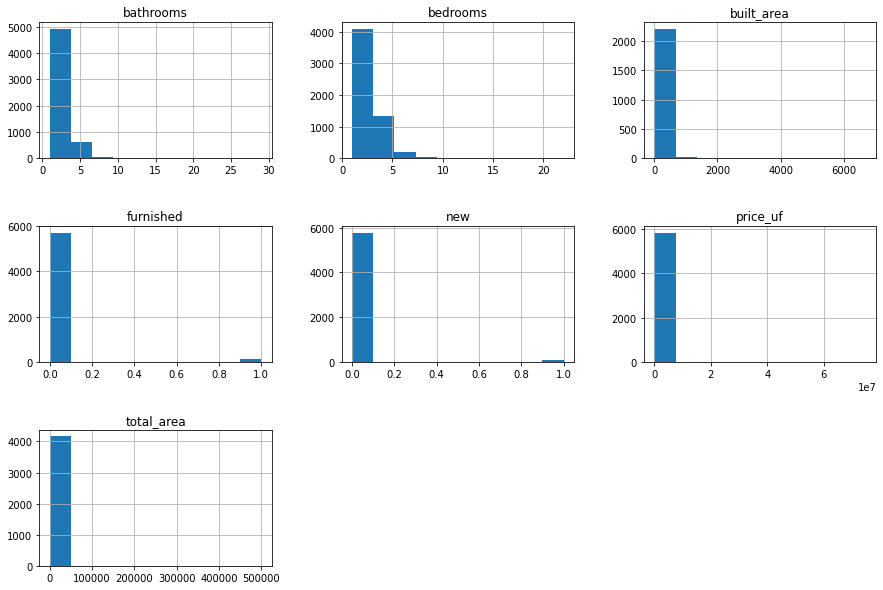

In [40]:
# See the distributions
# These look terribe! All extremely skewed. Have a look at some of the extreme values
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

In the following cells we will drop some of the rows that are missing too much information to be of use, and then weed out some rows with extreme values that are probably errors.

In [41]:
# Get a summary of the rows with null values for bedrooms and bathrooms
# Most are parcelas (plots of land) which probably do not have houses built on them
# A few are houses or apartments where the seller did not complete fields
print('rows missing bedrooms and bathrooms: ', df[df.bedrooms.isnull() & df.bathrooms.isnull()].shape[0])
df[df.bedrooms.isnull() & df.bathrooms.isnull()].home_type.value_counts()

rows missing bedrooms and bathrooms:  113


Parcela         91
Casa            15
Departamento     7
Name: home_type, dtype: int64

In [42]:
# Drop these rows because we are concerned with housing prices, not empty land
print('rows before: ', df.shape[0])
df = df[~(df.bedrooms.isnull() & df.bathrooms.isnull())]
print('rows after: ', df.shape[0])

rows before:  5849
rows after:  5736


In [43]:
# Get a summary of rows with null values for "tot_area" and "built_area"
# Wow, that's about 30% of the listings, mostly apartments
print('rows missing total area and built area: ', df[df.total_area.isnull() & df.built_area.isnull()].shape[0])
df[df.total_area.isnull() & df.built_area.isnull()].home_type.value_counts()

rows missing total area and built area:  1637


Departamento    1585
Casa              51
Parcela            1
Name: home_type, dtype: int64

In [44]:
# Drop listings for houses or plots of land missing areas
# Apartment areas are less varied, so they can be guessed reasonably
print('rows before: ', df.shape[0])
df = df[~(((df.home_type == 'Parcela') | (df.home_type == 'Casa')) & (df.total_area.isnull() & df.built_area.isnull()))]
print('rows after: ', df.shape[0])

rows before:  5736
rows after:  5684


Time to start looking at the extreme values in each column to see if they seem plausible or not.  Some will be clearly wrong, others not so clear.  Those that are probably wrong should be dropped, but this can be a messy process.

In [45]:
# See the rows with a very high number of bathrooms
df[(df.bathrooms > 7)|(df.bedrooms > 10)]

,date,comuna,home_type,new,total_area,built_area,bedrooms,bathrooms,furnished,address,description,price_uf
189,2020-09-10,Santiago,Departamento,0,NaN,NaN,22.0,2.0,0,"Santiago, Metro Sta Ana/Teatinos","www.procasa.cl Edificio Teatinos , estupendo d...",3100.00
2893,2020-08-28,Providencia,Departamento,0,554.0,NaN,12.0,8.0,0,"Providencia, Edificio de 4 Pisos en sector Bar...",- EN VENTA EDIFICIO DE 4 PISOS. - Propiedad de...,17428.45
3550,2020-06-05,Cerrillos,Casa,0,268.0,218.0,9.0,8.0,0,"Cerrillos, Caupolicán 7195",VITAHOME Propiedades vende a inversionistas In...,7330.00
3682,2020-09-09,Estación Central,Casa,0,500.0,NaN,10.0,8.0,0,"Estación Central, Estación Central","Oportunidad de Inversión, Estación Central, Ve...",6831.95
3816,2020-09-07,Santiago,Casa,0,940.0,NaN,14.0,NaN,0,"Santiago, república",Casona estilo francés Gran casona estilo franc...,55000.00
3877,2020-09-06,Estación Central,Casa,0,NaN,252.0,12.0,3.0,0,"Estación Central, Coronel Godoy/Av. 5 de Julio",www.procasa.cl ATENCIÓN INVERSIONISTA!!! Se ve...,3834.26
3969,2020-09-04,Santiago,Casa,0,500.0,650.0,14.0,10.0,1,"Santiago, Av. Brasil/Baquedano",Procasa Adrian Ulloa ofrece una excelente opor...,13942.76
4218,2020-09-03,La Florida,Casa,0,890.0,389.0,16.0,12.0,0,"La Florida, La Florida, Región Metropolitana",CASONA LO CAÑAS vista panorámica...... Combina...,12478.77
4324,2020-09-02,Estación Central,Casa,0,200.0,152.0,10.0,10.0,0,"Estación Central, Estación Central, Región Met...",SyA Propiedades vende amplia casa emplazada en...,6940.00
4524,2020-08-30,Santiago,Casa,0,237.0,374.0,13.0,6.0,0,"Santiago, Compañía de Jesús / Barrio Brasil",CASA EN VENTA. SANTIAGO. Amplia casa en Casco ...,12199.91


In [46]:
# Description mentions 2 bedrooms, confirming that 22 was an error
df.at[189, 'description']

'www.procasa.cl Edificio Teatinos , estupendo departamento amplio y luminoso, cercano al Metro Sta. Ana , comercio en general, grandes instituciones como Registro Civil, Bancos , centros medicos, restauranres y Malls El departamento cuenta con living y comedor con terraza y piso flotante , dos dor...'

In [47]:
df.at[189, 'bedrooms'] = 2
df.loc[189]

date                                                  2020-09-10
comuna                                                  Santiago
home_type                                           Departamento
new                                                            0
total_area                                                   NaN
built_area                                                   NaN
bedrooms                                                       2
bathrooms                                                      2
furnished                                                      0
address                         Santiago, Metro Sta Ana/Teatinos
description    www.procasa.cl Edificio Teatinos , estupendo d...
price_uf                                                    3100
Name: 189, dtype: object

A look at the descriptions reveals that row 4554 is actually a hotel for sale, and row 2893 is a small apartment building. We will drop these, since we are interested in individual homes. 

In [48]:
df.at[2893, 'description']

'- EN VENTA EDIFICIO DE 4 PISOS. - Propiedad de 554 m2 construidos sobre 210 m2 de terreno. - Emilio Vaisse 327. Providencia - Barrio Italia . Excelente ubicación y entorno. - 4 Dp independientes con Rol Único - Departamentos de 133 m2 cada uno - 1 Departamento por piso - Distribución por departam...'

In [49]:
df.at[4554, 'description']

'Excelente oportunidad, se vende hotel funcionando el cual se encuentra en San José de Maipo, en la zona del Cajón del Maipo. La propiedad cuenta con 5000 m2 de terreno y 1700 mts construidos. Alberga un amplio patio, piscinas (total 3) y terrazas, con un total de 21 habitaciones todas con baño en...'

In [50]:
# Drop extreme values
print('rows before: ', df.shape[0])
df = df.drop([2893, 4554])
print('rows after: ', df.shape[0])

rows before:  5684
rows after:  5682


The column for built area was the one with the highest amount of missing data, at around 62%.  Most of the listings missing this value are apartments.  The exact meaning of this column is somewhat ambiguous.  The column name is a translation of *superficie construida*, which could either refer to the area of a house's footprint, or the combined areas of all the floors.  The second interpretation seems more likely, since for some listings the value for built area is greater than the value for total area. The areas are expressed in square meters.

In [51]:
# See columns with very high built area
df[df.built_area > 1000]

,date,comuna,home_type,new,total_area,built_area,bedrooms,bathrooms,furnished,address,description,price_uf
4315,2020-09-02,Maipú,Casa,0,146.0,1160.0,6.0,3.0,0,"Maipú, Maipú, Región Metropolitana",Amplio terreno ubicado en sector privilegiado ...,13245.62
4723,2020-08-29,Colina,Casa,0,300.0,5000.0,5.0,5.0,0,"Colina, Chacabuco",ID 28418 Espaciosa Casa en lugar Privilegiado ...,13600.00
4955,2020-08-28,Vitacura,Casa,0,5180.0,1400.0,8.0,5.0,0,"Vitacura, Lo curro",MARAVILLOSA Y LUMINOSA CASA ESPECIAL PARA EMBA...,65000.00
5070,2020-08-23,Peñalolén,Casa,0,4000.0,1090.0,8.0,8.0,1,"Peñalolén, Las pircas",Maravillosa casa en las Pircas 8 habitaciones ...,50000.00
5670,2020-09-04,Melipilla,Parcela,0,5000.0,3000.0,3.0,NaN,0,"Melipilla, Sector Codigua",Parcela Melipilla Parcela ubicada en sector Co...,1900.00
5780,2020-08-28,Colina,Parcela,0,5000.0,3800.0,5.0,7.0,0,"Colina, Avenida El Valle",Vendo Parcela en Condominio Los Algarrobos de ...,25000.00


There are several suspiciously high values in Colina.  Again looking at the description gives some insight.  Row 5780 turns out to be a plot of land with several houses on it, athough they do not add up to 3,800 square meters. Row 4723 appears to have total area and built area backwards (full description on the website), so we can switch those.

In [52]:
df.at[5780, 'description']

'Vendo Parcela en Condominio Los Algarrobos de Chicureo, 5.000 mts2, 3.800 mts2 útiles, 2 CASAS, una de 410 mts2 y la otra de 90 mts2 . CASA 410 mts2: Hall de entrada, living y comedor separados, cocina amoblada y equipada, con comedor de diario, cuarto de lavandería, 5 dormitorios (3 en suites), ...'

In [53]:
df.at[4723, 'description']

'ID 28418 Espaciosa Casa en lugar Privilegiado Campo con excelente Conectividad San Martín NorOriente, Colegios , Universidad, Comercio!!!!! Contactar a Cristina Alarcón, mail cristina@vivaqui.com, Whatsapp +569 9872 9899 Características Hall de Acceso Living Comedor Separados en Desnivel, Comedor...'

In [54]:
# Switch area values for row 4723
df.at[4723, 'total_area'] = 5000
df.at[4723, 'built_area'] = 300
df.loc[4723]

date                                                  2020-08-29
comuna                                                    Colina
home_type                                                   Casa
new                                                            0
total_area                                                  5000
built_area                                                   300
bedrooms                                                       5
bathrooms                                                      5
furnished                                                      0
address                                        Colina, Chacabuco
description    ID 28418 Espaciosa Casa en lugar Privilegiado ...
price_uf                                                   13600
Name: 4723, dtype: object

Have a look at the descriptions of some of the other suspicious listings. There is one in Maipú with multiple buildings, as well as one in Melipilla with a built area that is implausibly large.

In [55]:
df.at[4315, 'description']

'Amplio terreno ubicado en sector privilegiado de maipú, zona h-4. A cuadras de la plaza de maipú, av. Pajaritos, municipalidad, mall, supermercados, etc. Sitio posee 3 construcciones regularizadas: - casa de albañilería de 75 m2, actualmente en uso - casa de albañilería de 36 m2, para remodelar -...'

In [56]:
df.at[5670, 'description']

'Parcela Melipilla Parcela ubicada en sector Codigua de Comuna de melipilla Cuenta con luz con medidor Agua de pozo Rol propio 3 Dormitorios 2 Baños 5000 m2 total de terreno'

In [57]:
# Drop row with built area greater than 2000 square meters, as well as listing in Maipú
print('rows before: ', df.shape[0])
df = df[~(df['built_area'] > 2000)]
df = df.drop(4315)
print('rows after: ', df.shape[0])

rows before:  5682
rows after:  5679


In [58]:
# Look at the values that are too small to be accurate
# 3 meters by 5 meters is too small for a house, especially one with 3 bedrooms
df[df.built_area < 25]

,date,comuna,home_type,new,total_area,built_area,bedrooms,bathrooms,furnished,address,description,price_uf
5256,2020-08-04,Puente Alto,Casa,0,1.0,1.0,3.0,1.0,0,"Puente Alto, Puente Alto","Se vende bella casa en condominio valle verde,...",2370.27
5475,2020-06-30,Lampa,Casa,0,30.0,15.0,3.0,1.0,0,"Lampa, Libertad Manuel Plaza 1144","Casa con estacionamiento para dos autos, ante ...",2962.84


In [59]:
# Drop the rows with small values
print('rows before: ', df.shape[0])
df = df[~(df['built_area'] < 25)]
print('rows after: ', df.shape[0])

rows before:  5679
rows after:  5677


The column for total area is a translation of *superficie total* This column also has a lot of missing data.  In the case of houses or *parcelas* this total area seems to refer to the size of the property, whereas with apartments it appears to refer to size of the apartment. Again the values are in square meters.

In [60]:
# See high values for total area. All of these seem plausible except for the first row
df[df.total_area > 20000]

,date,comuna,home_type,new,total_area,built_area,bedrooms,bathrooms,furnished,address,description,price_uf
527,2020-09-09,Providencia,Departamento,0,180000.0,NaN,4.0,3.0,0,"Providencia, Andrés Bello / Román Diaz",ID 28759 SOLO INVERSIONISTAS. Estupendo depart...,7041.09
3553,2020-06-01,Curacaví,Casa,0,20015.0,163.0,4.0,2.0,0,"Curacaví, Hacienda El Mauco, km. 7,6 Curacaví",Condominio de gran plusvalía y seguridad 24/7 ...,6936.52
3744,2020-09-08,Curacaví,Casa,0,49000.0,60.0,2.0,1.0,0,"Curacaví, La aurora",HERMOSO MINI CAMPO¡¡¡ en el mejor Condominio d...,4740.54
3749,2020-09-08,Curacaví,Casa,0,49000.0,60.0,1.0,1.0,0,"Curacaví, La aurora",GRAN OPORTUNIDAD PARA ECOLOGISTAS - AMANTES DE...,4740.54
5538,2020-06-13,San José de Maipo,Casa,0,30000.0,200.0,3.0,1.0,0,"San José de Maipo, Camino A Lagunillas",Venta de parcela de 30.000 m2 con casa de 200 ...,4426.83
5592,2020-06-01,Curacaví,Parcela,0,20015.0,163.0,4.0,2.0,0,"Curacaví, Hacienda El Mauco",Condominio de gran plusvalía y seguridad 24/7 ...,6936.52
5601,2020-09-10,El Monte,Parcela,0,35000.0,1000.0,6.0,2.0,1,"El Monte, Autopista Del Sol/Río Maipo",.:PROCASA JORGE PABLO CARO PROPIEDADES:. Vende...,6971.38
5637,2020-09-08,Curacaví,Parcela,0,49000.0,60.0,1.0,1.0,0,"Curacaví, La aurora",GRAN OPORTUNIDAD PARA ECOLOGISTAS - AMANTES DE...,4740.54


In [61]:
df.at[527, 'description']

'ID 28759 SOLO INVERSIONISTAS. Estupendo departamento en las Torres de Tajamar. Cercano al metro Manuel Montt y al del Salvador. PISO ALTO. Abundante comercio, restoranes centros financieros y farmacias. De gran conectividad en el corazón de Providencia. Contactar a KARIN BOETTIGER al 9927649 o al...'

In [62]:
# Drop row with total area greater than 100000 square meters
print('rows before: ', df.shape[0])
df = df[~(df['total_area'] > 100000)]
print('rows after: ', df.shape[0])

rows before:  5677
rows after:  5676


In [63]:
# See the low values for total area. There are quite a few here
df[df.total_area < 25]

,date,comuna,home_type,new,total_area,built_area,bedrooms,bathrooms,furnished,address,description,price_uf
3,2020-09-09,Santiago,Departamento,0,23.00,NaN,1.0,1.0,0,"Santiago, Huérfanos",Oportunidad Inversionistas o particulares. Ven...,1575.00
67,2020-08-21,Estación Central,Departamento,1,22.00,NaN,1.0,1.0,0,"Estación Central, Sanz 81, 81",Código Interno: EstaciónCentral_123 Departamen...,1380.00
96,2020-06-13,Santiago,Departamento,0,20.00,NaN,1.0,1.0,0,"Santiago, Mapocho 1522",Departamento Estudio de un ambiente ubicado en...,1446.56
162,2020-09-10,Las Condes,Departamento,0,20.00,NaN,3.0,2.0,0,"Las Condes, El Golf/Magdalena",www.procasa.cl FRANCISCO VIAL PROPIEDADES. (CÓ...,11000.00
498,2020-09-09,Las Condes,Departamento,0,10.00,NaN,3.0,2.0,0,"Las Condes, Florencio Barrios/Tomas Moro",www.procasa.cl FRANCISCO VIAL PROPIEDADES (CÓD...,5995.00
500,2020-09-09,Providencia,Departamento,0,7.00,NaN,1.0,1.0,0,"Providencia, Nueva Providencia/Manuel Montt",www.procasa.cl FRANCISCO VIAL PROPIEDADES (CÓD...,2790.00
501,2020-09-09,Providencia,Departamento,0,6.00,NaN,1.0,1.0,0,"Providencia, Nueva Providencia/Manuel Montt",www.procasa.cl FRANCISCO VIAL PROPIEDADES (CÓD...,3350.00
502,2020-09-09,Providencia,Departamento,0,7.00,NaN,1.0,1.0,0,"Providencia, Nueva Providencia/Manuel Montt",www.procasa.cl FRANCISCO VIAL PROPIEDADES (CÓD...,2790.00
503,2020-09-09,Providencia,Departamento,0,6.00,NaN,1.0,1.0,0,"Providencia, Nueva Providencia/Manuel Montt",www.procasa.cl FRANCISCO VIAL PROPIEDADES (CÓD...,3140.00
504,2020-09-09,Providencia,Departamento,0,6.00,NaN,1.0,1.0,0,"Providencia, Nueva Providencia/Manuel Montt",www.procasa.cl FRANCISCO VIAL PROPIEDADES (CÓD...,3139.00


This next step is a bit tricky.  The smallest possible apartment is probably around 20 square meters (this would be, for example, 4m by 5m, NOT 20m by 20m).  It is also highly unlikely that an apartment of that size has multiple bedrooms or bathrooms. It is possible that a few sellers have mistakenly written the length of their apartment, or have simply guessed the area.  Let's drop any listings with total areas under 16 square meters, as well as any under 25 square meters that claim to have more than two bedrooms or one bathroom.

In [64]:
# Drop listings under 16 square meters
print('rows before: ', df.shape[0])
df = df[~(df['total_area'] < 16)]
print('rows after: ', df.shape[0])

rows before:  5676
rows after:  5652


In [65]:
# Drop listings under 25 square meters with more than 2 bedrooms or one bathroom
print('rows before: ', df.shape[0])
df = df[~((df['total_area'] < 25)&((df.bedrooms > 2)|(df.bathrooms > 1)))]
print('rows after: ', df.shape[0])

rows before:  5652
rows after:  5649


In [66]:
# See if there are apartments over 1000 square meters
# Gives us two sets of identical listings that are several orders of magnitude too large 
df[(df.home_type == 'Departamento')&(df.total_area > 1000)]

,date,comuna,home_type,new,total_area,built_area,bedrooms,bathrooms,furnished,address,description,price_uf
2620,2020-08-29,Vitacura,Departamento,0,10816.0,NaN,3.0,3.0,0,"Vitacura, Queretaro con Av. Vitacura",Cod. 2953. Moderno departamento con finas term...,14218.0
2623,2020-08-29,Vitacura,Departamento,0,9541.0,NaN,2.0,2.0,0,"Vitacura, Queretaro con Av. Vitacura",Cod. 2954. Moderno departamento con finas term...,11553.0
2660,2020-08-29,Vitacura,Departamento,0,10816.0,NaN,3.0,3.0,0,"Vitacura, Queretaro con Av. Vitacura",Cod. 2953. Moderno departamento con finas term...,14218.0
2664,2020-08-29,Vitacura,Departamento,0,9541.0,NaN,2.0,2.0,0,"Vitacura, Queretaro con Av. Vitacura",Cod. 2954. Moderno departamento con finas term...,11553.0


In [67]:
# Drop these rows
print('rows before: ', df.shape[0])
df = df[~((df.home_type == 'Departamento')&(df.total_area > 1000))]
print('rows after: ', df.shape[0])

rows before:  5649
rows after:  5645


In [68]:
# See prices over 70,000 UF (roughly 2.5 million USD)
df[df.price_uf > 70000]

,date,comuna,home_type,new,total_area,built_area,bedrooms,bathrooms,furnished,address,description,price_uf
1461,2020-09-03,La Florida,Departamento,0,NaN,NaN,2.0,1.0,0,"La Florida, Av. Vicuña Mackenna/Barcelona","Procasa, Aleida Lama Propiedades, código inter...",74900000.00
4793,2020-08-29,Las Condes,Casa,0,800.0,340.0,5.0,3.0,0,"Las Condes, Colon / Hernando de Magallanes","Casa COMERCIAL, SOLO INMOBILIARIAS.Contactar a...",71108.06
4947,2020-08-28,Lo Barnechea,Casa,0,3100.0,850.0,8.0,7.0,0,"Lo Barnechea, Colegio santiago college-everest",Casa en Venta Lo Barnechea Coordina Cecilia Ca...,78000.00
5392,2020-07-20,Buin,Casa,0,100.0,70.0,3.0,1.0,0,"Buin, dn belio",casa en venta $ 37.900.000 en buin maipo a pas...,1030171.24


One of these listings had a price which was originally listed in US dollars. It seems highly probable the price supposed to be in Chilean pesos. This problem can be corrected by multiplying the price by the exchange rate for USD to CLP.

In [69]:
df.loc[5392, 'price_uf'] = round(df.loc[5392, 'price_uf'] * 0.0013, 2)
df.loc[5392]

date                                                  2020-07-20
comuna                                                      Buin
home_type                                                   Casa
new                                                            0
total_area                                                   100
built_area                                                    70
bedrooms                                                       3
bathrooms                                                      1
furnished                                                      0
address                                          Buin, dn  belio
description    casa en venta $ 37.900.000 en buin maipo a pas...
price_uf                                                 1339.22
Name: 5392, dtype: object

That looks much better now.  Of the other listings, there are two that are plausible, both a little over 70,000 UF, as well as two that are clearly incorrect.  To eliminate the implausibly high prices, we drop the listings with prices over 100,000 UF.

In [70]:
# Drop rows with extreme prices
print('rows before: ', df.shape[0])
df = df[~(df['price_uf'] > 100000)]
print('rows after: ', df.shape[0])

rows before:  5645
rows after:  5644


In [71]:
# See the rows with very low prices
df[df.price_uf < 500]

,date,comuna,home_type,new,total_area,built_area,bedrooms,bathrooms,furnished,address,description,price_uf
19,2020-09-08,Providencia,Departamento,0,82.0,NaN,2.0,2.0,1,"Providencia, Las Hortensias 2321","Superficie aproximada 76 m2, Terraza 6m2.- Her...",20.74
628,2020-09-08,Santiago,Departamento,0,46.0,NaN,2.0,2.0,0,"Santiago, Fray Camilo Henríquez 686","Edificio Santiago Oriente 2, Calle fray Camilo...",0.11
635,2020-09-07,Providencia,Departamento,0,102.0,NaN,3.0,2.0,0,"Providencia, Jaime Guzmán Errázuriz",ARAYA PROPIEDADES ARRIENDA. Espectacular y cóm...,26.14
914,2020-09-04,Santiago,Departamento,0,30.0,NaN,1.0,1.0,0,"Santiago, Sta Isabel 517",Se Arrienda hermoso departamento de 30 M2 de 1...,8.71
1451,2020-09-03,Las Condes,Departamento,0,NaN,NaN,3.0,3.0,0,"Las Condes, ¡Oferta online - desde UF 8.890!/L...",www.procasa.cl Los Pozos // Rotonda Atenas. Of...,0.00
1738,2020-09-01,Ñuñoa,Departamento,0,94.0,NaN,3.0,NaN,0,"Ñuñoa, Manuel Montt esquina Simón Bolívar",Depto 3D2B en Manuel Montt esquina Simón Bolív...,6.00
3736,2020-09-09,La Florida,Casa,0,125.0,67.0,3.0,2.0,0,"Santiago, Río baker","Casa en arriendo, ubicada en un sector de La F...",15.69
3808,2020-09-07,Puente Alto,Casa,0,212.0,87.0,3.0,NaN,0,"Puente Alto, Diego Portales con Sanchez Fontec...",Hermosa casa Diego Portales Cordillera ADS COR...,0.00
3812,2020-09-07,Providencia,Casa,0,90.0,90.0,3.0,NaN,0,"Providencia, Av pedro de Valdivia",venta departamento Av. Pedro de Valdivia 1930 ...,0.01
4228,2020-09-03,Vitacura,Casa,0,300.0,290.0,6.0,NaN,0,"Vitacura, Santa Teresa de Los Andes","Vitacura, Casa de tres pisos, en condominio Ca...",0.00


Once again we have quite a few listings with highly improbable values, even several free homes in some of Santiago's more expensive *comuna*. In some of these listings it is possible that sellers wrote the price in UF and accidentally selected Chilean Pesos as the unit. Or perhaps they are simply errors.  Either way, we will drop any rows with prices under 100 UF.

In [72]:
# Drop rows with prices under 100 UF
print('rows before: ', df.shape[0])
df = df[~(df['price_uf'] < 100)]
print('rows after: ', df.shape[0])

rows before:  5644
rows after:  5632


In [73]:
# See how much missing data is there now
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='%', ascending=False)

,count,%
built_area,3429,60.884233
total_area,1617,28.710938
bathrooms,132,2.343750
bedrooms,29,0.514915
description,15,0.266335
date,0,0.000000
comuna,0,0.000000
home_type,0,0.000000
new,0,0.000000
furnished,0,0.000000


In [74]:
# Looks a lot better than before
df.describe()

,new,total_area,built_area,bedrooms,bathrooms,furnished,price_uf
count,5632.000000,4015.000000,2203.000000,5603.000000,5500.000000,5632.000000,5632.000000
mean,0.009055,746.428685,175.827776,2.964483,2.174909,0.020064,7111.248326
std,0.094736,2432.875777,128.143464,1.429026,1.151210,0.140231,7228.270177
min,0.000000,18.000000,30.000000,1.000000,1.000000,0.000000,522.850000
25%,0.000000,67.000000,92.000000,2.000000,1.000000,0.000000,2888.980000
50%,0.000000,135.000000,139.000000,3.000000,2.000000,0.000000,4182.830000
75%,0.000000,328.000000,215.000000,4.000000,3.000000,0.000000,9062.790000
max,1.000000,49000.000000,1400.000000,16.000000,12.000000,1.000000,78000.000000


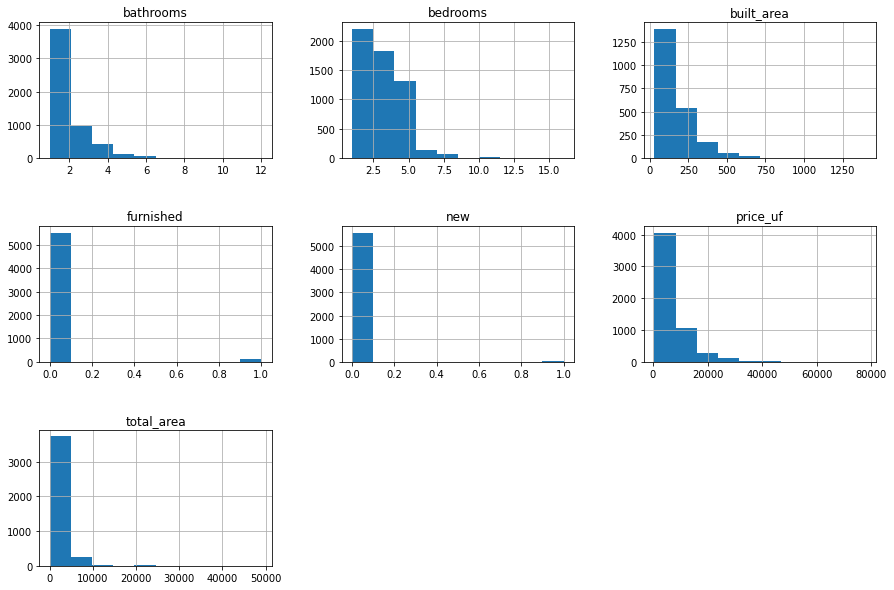

In [75]:
# Some of the distributions are still a bit skewed, but they are much better than before
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

In [76]:
# Check the shape
df.shape

(5632, 12)

In [77]:
# Save the cleaned data as a csv file
df.to_csv('clean_data.csv', index=False)